**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?

In [284]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualization
import warnings  # For handling warnings
warnings.filterwarnings("ignore")  # Ignore warnings

import seaborn as sns  # For statistical data visualization
import plotly.express as px  # For interactive plots

In [285]:
inp0 = pd.read_csv("Data/googleplaystore_v2.csv")
inp0.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [286]:
# Display the shape (number of rows and columns) of the DataFrame
inp0.shape

(10841, 13)

In [287]:
# Display a concise summary of the DataFrame, including the number of non-null entries and data types of each column
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [288]:
# Display the number of missing values in each column of the DataFrame
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [289]:
# Filter out rows where the 'Rating' column is null
inp1 = inp0[~inp0.Rating.isnull()]

# Display the shape (number of rows and columns) of the filtered DataFrame
inp1.shape

(9367, 13)

In [290]:
# Check for any remaining missing values in the 'Rating' column
inp1.Rating.isnull().sum()

np.int64(0)

In [291]:
# Display the number of missing values in each column of the DataFrame
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [292]:
# Display rows where the 'Android Ver' column is null
inp1[inp1['Android Ver'].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [293]:
# Display the row with index 10472
inp1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [294]:
# Filter out rows where 'Android Ver' is null and 'Category' is "1.9"
inp1[(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

               Size Installs Type     Price Content Rating             Genres  \
10472  21516.529524     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [295]:
# Filter out rows where 'Android Ver' is null and 'Category' is "1.9"
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

In [296]:
# Display rows where the 'Android Ver' column is null
inp1[inp1['Android Ver'].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

In [297]:
# Display the count of unique values in the 'Android Ver' column
inp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [298]:
# Get the mode (most frequent value) of the 'Android Ver' column
inp1['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [299]:
# Get the mode (most frequent value) of the 'Android Ver' column
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [300]:
# Fill missing values in the 'Android Ver' column with the mode (most frequent value)
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [301]:
# Display the count of unique values in the 'Android Ver' column
inp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [302]:
# Check for any remaining missing values in the 'Android Ver' column
inp1['Android Ver'].isnull().sum()

np.int64(0)

In [303]:
# Display the number of missing values in each column of the DataFrame
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [304]:
# Display the count of unique values in the 'Current Ver' column
inp1['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [305]:
# Fill missing values in the 'Current Ver' column with the mode (most frequent value)
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [306]:
# Display the count of unique values in the 'Current Ver' column
inp1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [307]:
# Display the data types of each column in the DataFrame
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [308]:
# Display the first few rows of the DataFrame to get an overview of the data
inp1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [309]:
# Display the count of unique values in the 'Price' column
inp1.Price.value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [310]:
# Convert the 'Price' column to numeric values
# If the price is "0", set it to 0
# Otherwise, remove the dollar sign and convert the remaining string to a float
inp1.Price = inp1.Price.apply(lambda x: 0 if x == "0" else float(x[1:]))

In [311]:
inp1.Price.dtype

dtype('float64')

In [312]:
# Display the count of unique values in the 'Reviews' column
inp1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [313]:
# Convert the 'Reviews' column to integer type
inp1.Reviews = inp1.Reviews.astype("int32")

# Display summary statistics for the 'Reviews' column
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [314]:
# Display the first few rows of the 'Installs' column to get an overview of the data
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [315]:
# Function to clean the 'Installs' column by removing commas and plus signs, and converting to integer
def clean_installs(val):
    return int(val.replace(",", "").replace("+", ""))

# Check the type of the cleaned 'Installs' value
type(clean_installs("3,000+"))

# Apply the 'clean_installs' function to the 'Installs' column
inp1.Installs = inp1.Installs.apply(clean_installs)

# Display summary statistics for the 'Installs' column
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [316]:
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [317]:
# Display rows where the number of reviews is greater than the number of installs
inp1[(inp1.Reviews > inp1.Installs)]

App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000        10  Free   0.00           Teen     Social   
10697  16000.000000         1  Paid   0.99       Everyone     Arcade   

           Last Updated         Current Ver         Android Ver  
2454     August 2, 2018              1.0.72        4.0.3 and up  
4663      July 30, 2018  Varies with device  Varies with device  
5917   February 8, 2017               1.0.4          2.3 and up  
6700      July 23, 2018                 1.0          4.1 and up  
7402     March 11, 2017                 0.1          2.3 and up  
8591      July 23, 2018                 1.0          4.0 and up  
10697     March 3, 2017                 1.0          2.3 and up

In [318]:
# Display the shape (number of rows and columns) of the DataFrame where the number of reviews is greater than the number of installs
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [319]:
# Display rows where the number of reviews is greater than the number of installs
inp1[(inp1.Reviews > inp1.Installs)]

App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000        10  Free   0.00           Teen     Social   
10697  16000.000000         1  Paid   0.99       Everyone     Arcade   

           Last Updated         Current Ver         Android Ver  
2454     August 2, 2018              1.0.72        4.0.3 and up  
4663      July 30, 2018  Varies with device  Varies with device  
5917   February 8, 2017               1.0.4          2.3 and up  
6700      July 23, 2018                 1.0          4.1 and up  
7402     March 11, 2017                 0.1          2.3 and up  
8591      July 23, 2018                 1.0          4.0 and up  
10697     March 3, 2017                 1.0          2.3 and up

In [320]:
# Filter out rows where the number of reviews is greater than the number of installs
inp1 = inp1[inp1.Reviews <= inp1.Installs]

In [321]:
# Display rows where the app type is 'Free' but the price is greater than 0
inp1[(inp1.Type == "Free") & (inp1.Price > 0)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

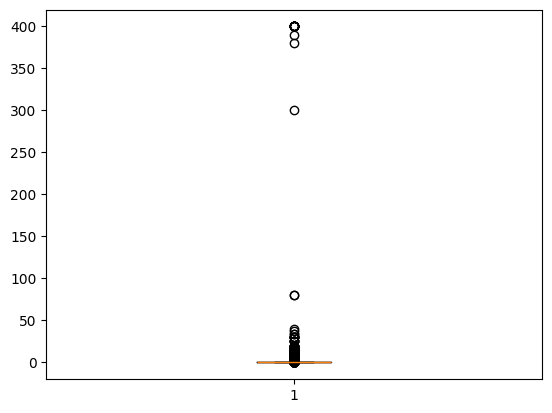

In [322]:
# Create a box plot for the 'Price' column to visualize the distribution of app prices
plt.boxplot(inp1.Price)
plt.show()

In [323]:
# Display rows where the 'Price' column is greater than 200
inp1[inp1.Price > 200]

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   
5366                       I Am Rich     FAMILY     3.6      217   4900.0   
5369                       I am Rich    FINANCE     4.3      180   3800.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

In [324]:
# Filter out rows where the 'Price' column is greater than or equal to 200
inp1 = inp1[inp1.Price < 200]

In [325]:
# Display summary statistics for the 'Price' column
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<Axes: >

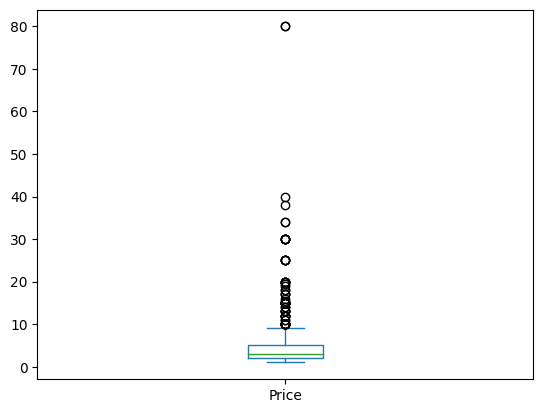

In [326]:
# Create a box plot for the 'Price' column to visualize the distribution of app prices greater than 0
inp1[inp1.Price > 0].Price.plot.box()

In [327]:
# Display rows where the 'Price' column is greater than 30
inp1[inp1.Price > 30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

In [328]:
# Filter out rows where the 'Price' column is greater than 30
inp1 = inp1[inp1.Price <= 30]

# Display the shape (number of rows and columns) of the filtered DataFrame
inp1.shape

(9338, 13)

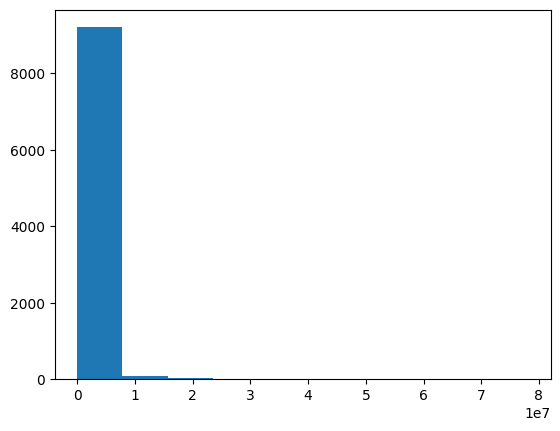

In [329]:
# Display a histogram of the 'Reviews' column
plt.hist(inp1.Reviews)
plt.show()

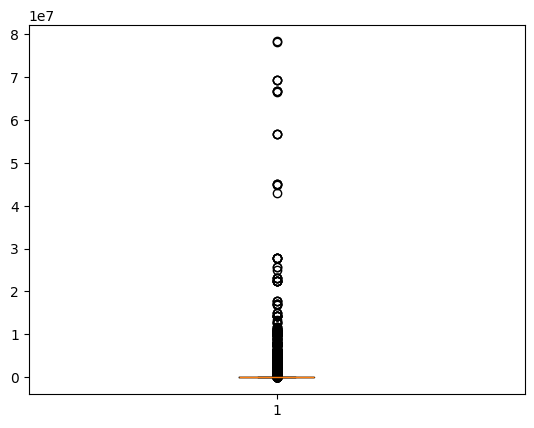

In [330]:
plt.boxplot(inp1.Reviews)
plt.show()

In [331]:
inp1[inp1.Reviews >= 10000000]

App       Category  \
335            Messenger – Text and Video Chat for Free  COMMUNICATION   
336                                  WhatsApp Messenger  COMMUNICATION   
342                                     Viber Messenger  COMMUNICATION   
378         UC Browser - Fast Download Private & Secure  COMMUNICATION   
381                                  WhatsApp Messenger  COMMUNICATION   
...                                                 ...            ...   
6449                        BBM - Free Calls & Messages  COMMUNICATION   
7536  Security Master - Antivirus, VPN, AppLock, Boo...          TOOLS   
7937                                     Shadow Fight 2           GAME   
8894  Cache Cleaner-DU Speed Booster (booster & clea...          TOOLS   
8896  DU Battery Saver - Battery Charger & Battery Life          TOOLS   

      Rating   Reviews          Size    Installs  Type  Price Content Rating  \
335      4.0  56642847  21516.529524  1000000000  Free    0.0       Everyone   
336      4.4  69119316  21516.529524  1000000000  Free    0.0       Everyone   
342      4.3  11334799  21516.529524   500000000  Free    0.0       Everyone   
378      4.5  17712922  40000.000000   500000000  Free    0.0           Teen   
381      4.4  69119316  21516.529524  1000000000  Free    0.0       Everyone   
...      ...       ...           ...         ...   ...    ...            ...   
6449     4.3  12843436  21516.529524   100000000  Free    0.0       Everyone   
7536     4.7  24900999  21516.529524   500000000  Free    0.0       Everyone   
7937     4.6  10981850  88000.000000   100000000  Free    0.0   Everyone 10+   
8894     4.5  12759815  15000.000000   100000000  Free    0.0       Everyone   
8896     4.5  13479633  14000.000000   100000000  Free    0.0       Everyone   

             Genres    Last Updated         Current Ver         Android Ver  
335   Communication  August 1, 2018  Varies with device  Varies with device  
336   Communication  August 3, 2018  Varies with device  Varies with device  
342   Communication   July 18, 2018  Varies with device  Varies with device  
378   Communication  August 2, 2018         12.8.5.1121          4.0 and up  
381   Communication  August 3, 2018  Varies with device  Varies with device  
...             ...             ...                 ...                 ...  
6449  Communication  August 2, 2018  Varies with device        4.0.3 and up  
7536          Tools  August 4, 2018               4.6.6  Varies with device  
7937         Action    July 2, 2018              1.9.38          3.0 and up  
8894          Tools   July 25, 2018               3.1.2          4.0 and up  
8896          Tools    June 5, 2018             4.8.7.8          4.0 and up  

[92 rows x 13 columns]

In [332]:
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

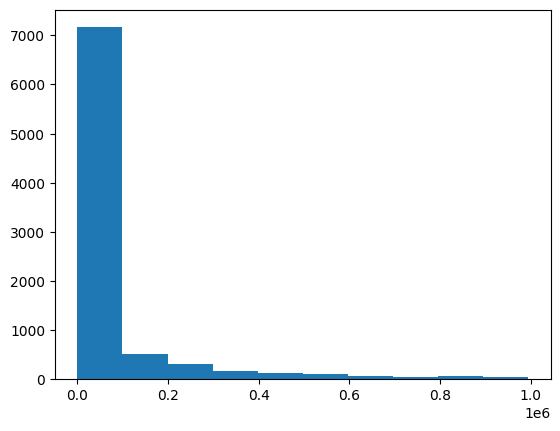

In [333]:
plt.hist(inp1.Reviews)
plt.show()

In [334]:
inp1.Size.describe()

count      8634.000000
mean      21636.459060
std       20663.668474
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

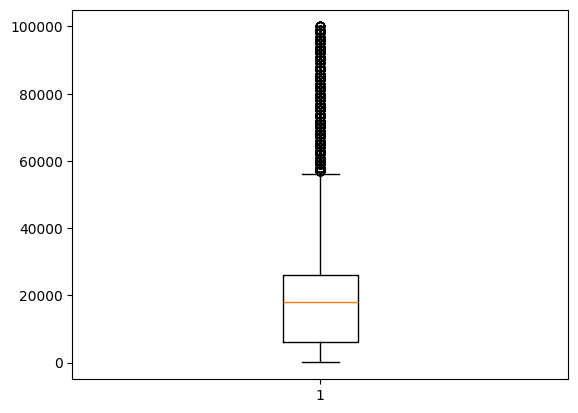

In [335]:
plt.boxplot(inp1.Size)
plt.show()

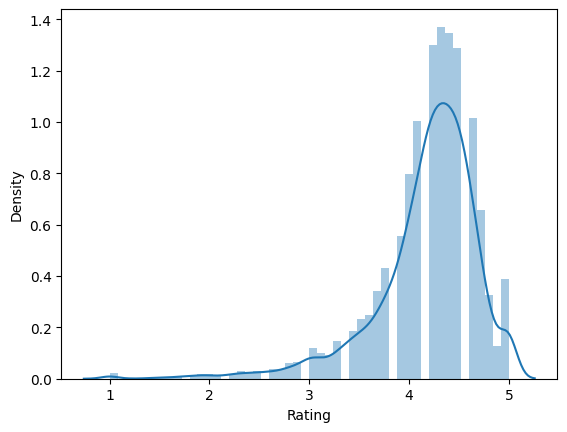

In [336]:
sns.distplot(inp1.Rating)
plt.show()

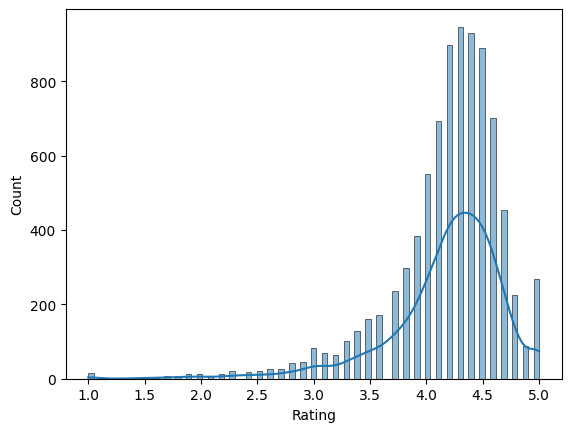

In [337]:
sns.histplot(inp1.Rating, kde=True)
plt.show()

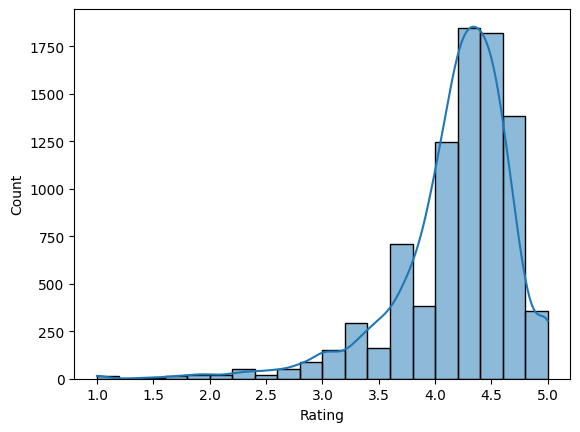

In [338]:
sns.histplot(inp1.Rating, bins=20,kde=True)
plt.show()

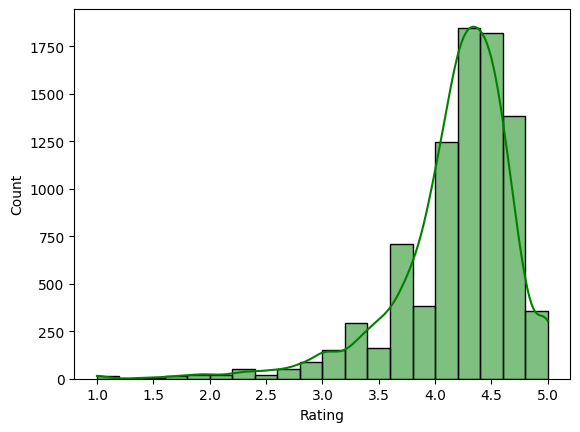

In [339]:
sns.histplot(inp1.Rating, bins=20,kde=True,color="g")
plt.show()

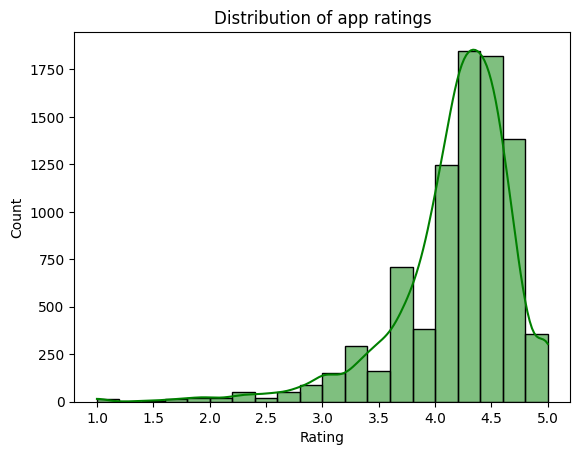

In [340]:
sns.histplot(inp1.Rating, bins=20,kde=True,color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

In [341]:
?sns.set_style

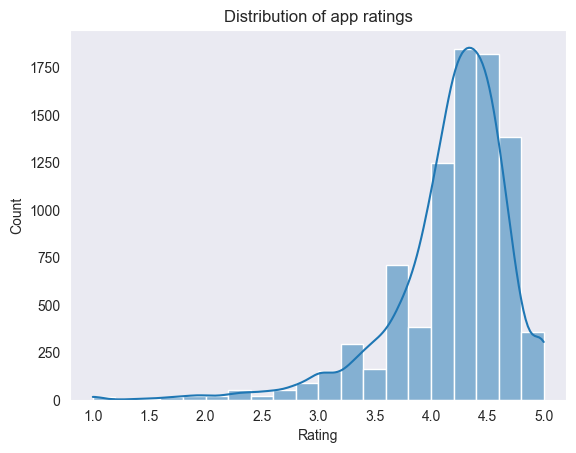

In [342]:
sns.set_style("dark")
sns.histplot(inp1.Rating, bins=20,kde=True)
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

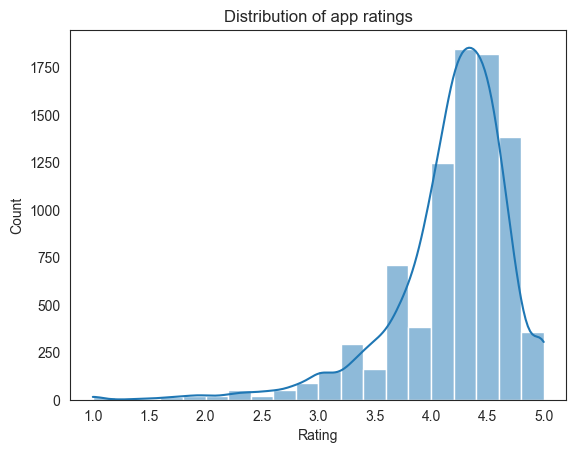

In [343]:
sns.set_style("white")
sns.histplot(inp1.Rating, bins=20,kde=True)
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

In [344]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [345]:
plt.style.use("tableau-colorblind10")

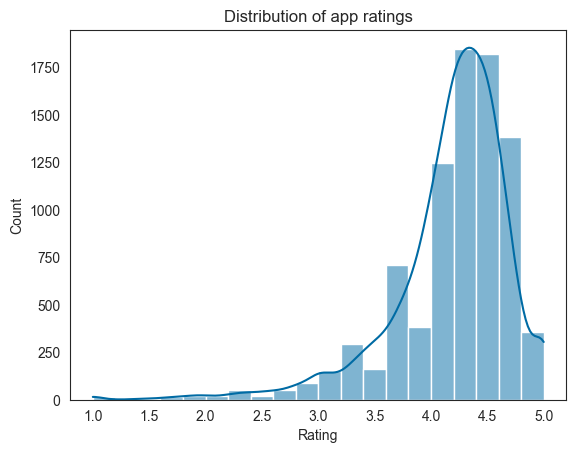

In [346]:
sns.histplot(inp1.Rating, bins=20,kde=True)
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

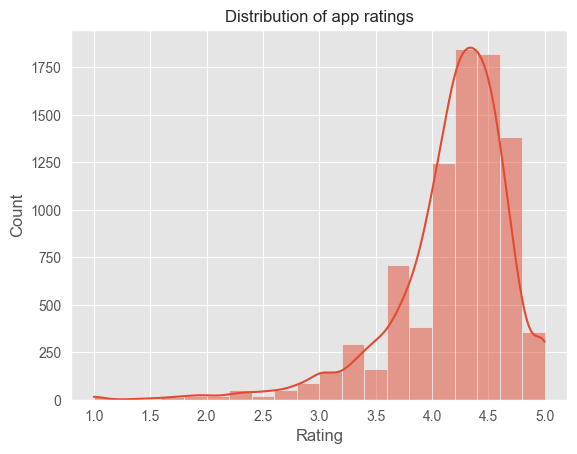

In [347]:
plt.style.use("ggplot")
sns.histplot(inp1.Rating, bins=20,kde=True)
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

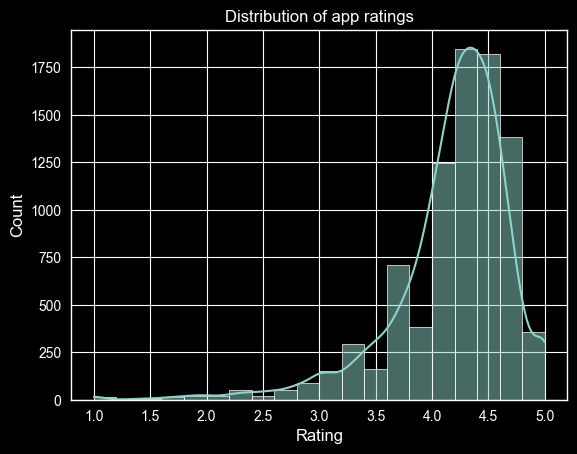

In [348]:
plt.style.use("dark_background")
sns.histplot(inp1.Rating, bins=20,kde=True)
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

In [349]:
plt.style.use("default")

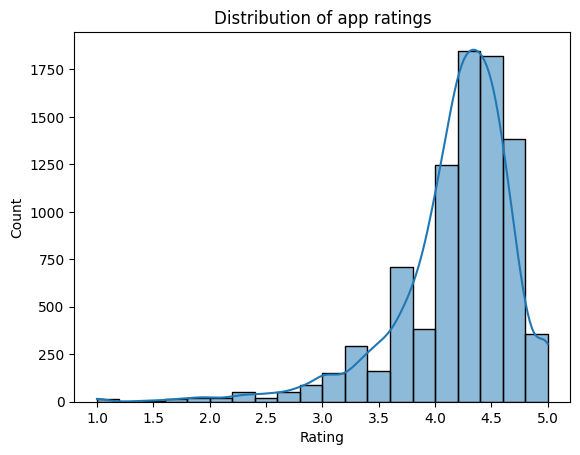

In [350]:
sns.histplot(inp1.Rating, bins=20,kde=True)
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

In [351]:
inp1['Content Rating'].value_counts()

Content Rating
Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [352]:
inp1[inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

App Category  Rating  Reviews  \
298   Manga Master - Best manga & comic reader   COMICS     4.6    24005   
3043         DraftKings - Daily Fantasy Sports   SPORTS     4.5    50017   
6424                               Manga Books   COMICS     3.8     7326   
8266                    DC Universe Online Map    TOOLS     4.1     1186   

              Size  Installs  Type  Price   Content Rating  Genres  \
298    4900.000000    500000  Free    0.0  Adults only 18+  Comics   
3043  41000.000000   1000000  Free    0.0  Adults only 18+  Sports   
6424  21516.529524    500000  Free    0.0  Adults only 18+  Comics   
8266   6400.000000     50000  Free    0.0          Unrated   Tools   

           Last Updated         Current Ver         Android Ver  
298        July 4, 2018             1.1.7.0          4.1 and up  
3043      July 24, 2018            3.21.324          4.4 and up  
6424     August 3, 2018  Varies with device  Varies with device  
8266  February 27, 2012                 1.3        2.3.3 and up

In [353]:
inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [354]:
inp1.shape

(8630, 13)

In [355]:
inp1.reset_index(inplace=True, drop=True)

In [356]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   int64  
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 842.9+ KB


In [357]:
inp1['Content Rating'].value_counts()

Content Rating
Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: count, dtype: int64

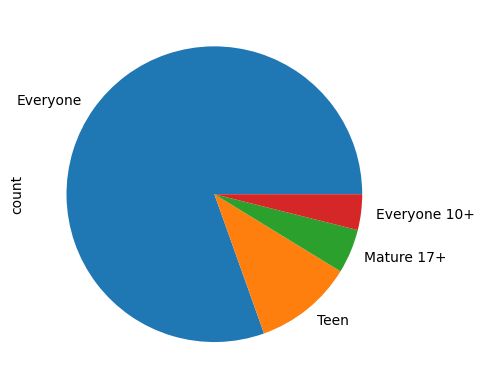

In [358]:
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

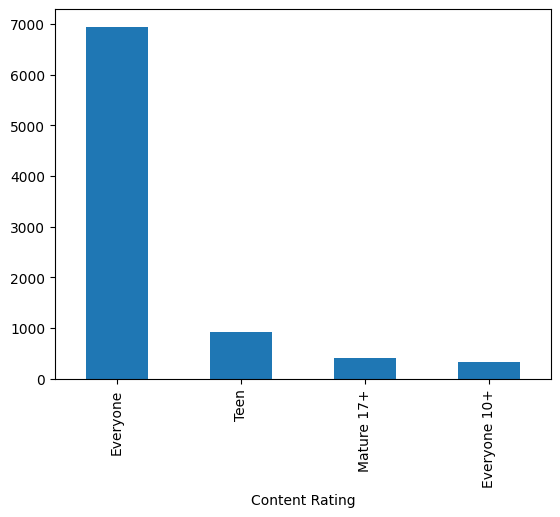

In [359]:
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

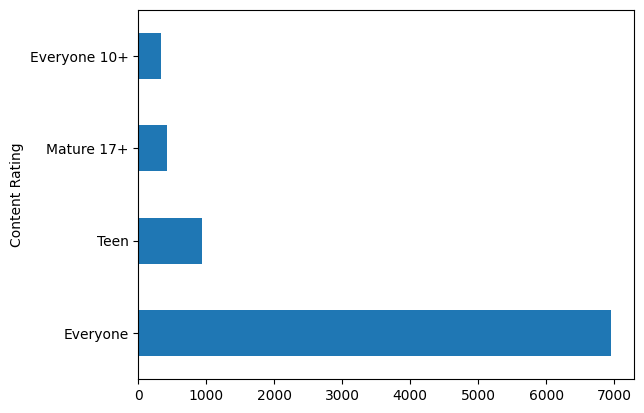

In [360]:
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

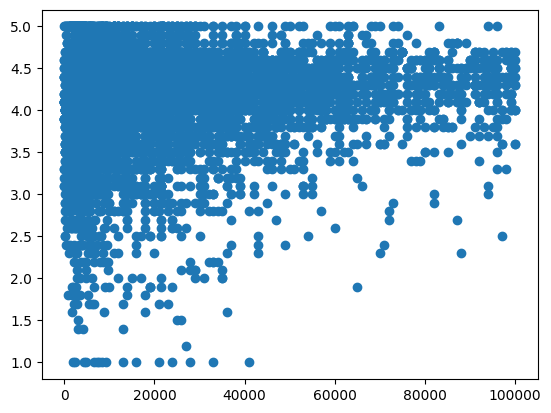

In [361]:
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [362]:
?sns.jointplot

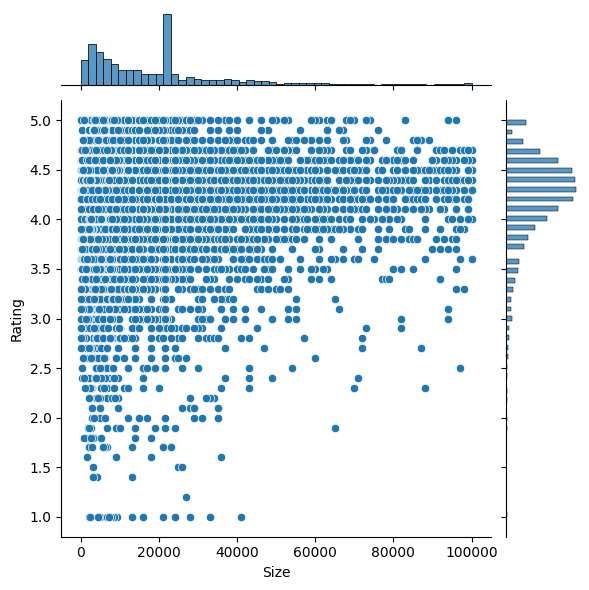

In [363]:
sns.jointplot( x = 'Size', y = 'Rating', data = inp1)
plt.show()

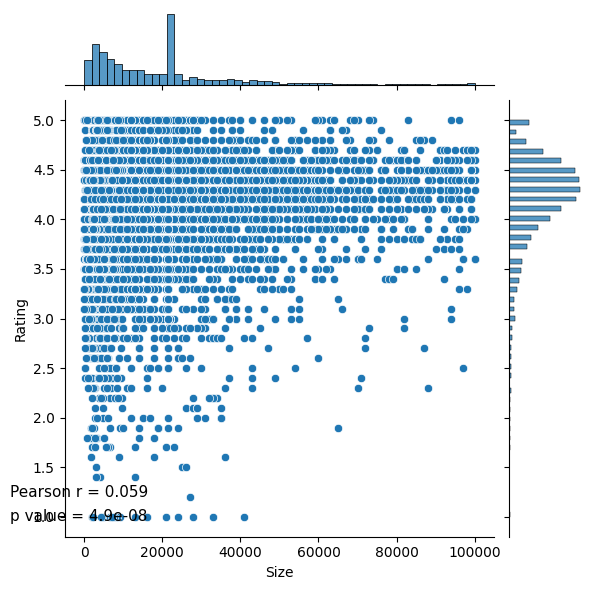

In [364]:
import scipy.stats as ss
# str1 will hold the value of Pearson r
str1 = 'Pearson r = {}'.format(ss.pearsonr(inp1.Size, inp1.Rating)[0].round(3))

# str2 will hold the p value
str2 = 'p value = {}'.format(ss.pearsonr(inp1.Size, inp1.Rating)[1].round(9))

# Create the joint plot
g = sns.jointplot(x="Size", y="Rating", data=inp1)

# Manually align the position of str1 and str2
plt.text(-1250, 1.25, str1, horizontalalignment='center', verticalalignment='center', fontsize=11)
plt.text(-1250, 1.0, str2, horizontalalignment='center', verticalalignment='center', fontsize=11)

plt.show()

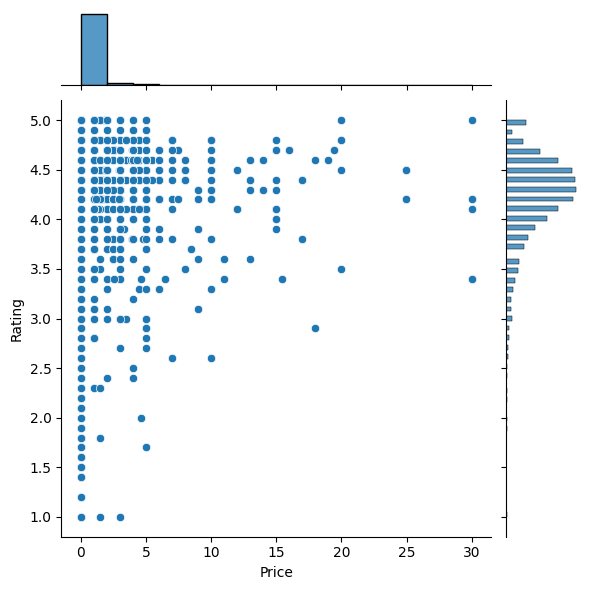

In [365]:
sns.jointplot( x = 'Price', y = 'Rating', data = inp1)
plt.show()

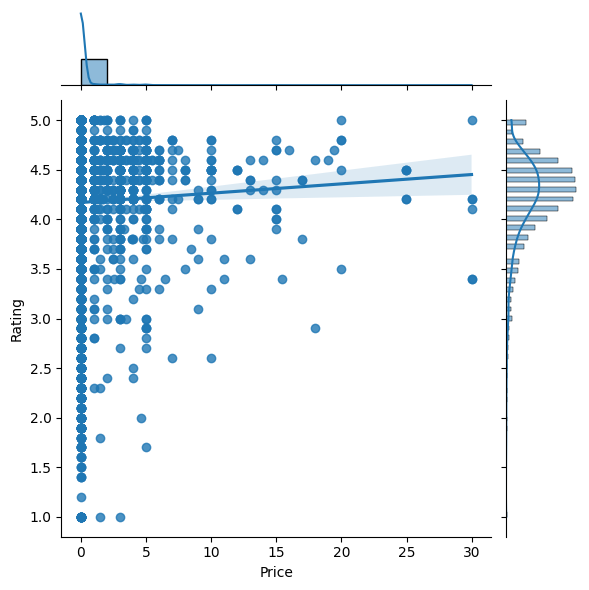

In [366]:
sns.jointplot( x = 'Price', y = 'Rating', data = inp1, kind = 'reg')
plt.show()

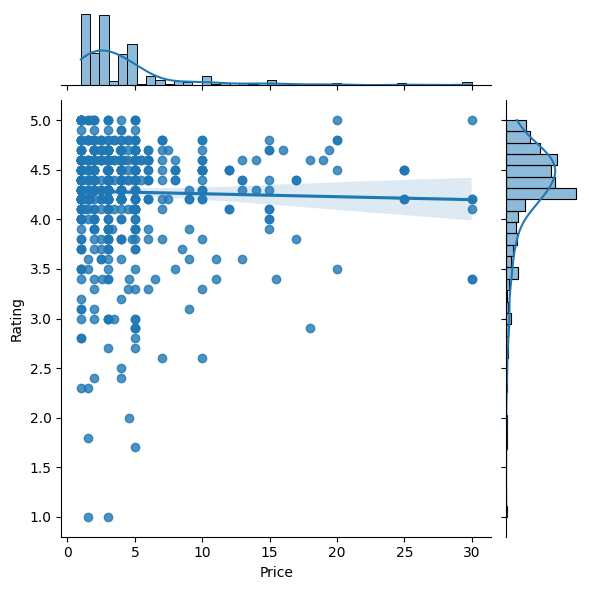

In [367]:
sns.jointplot( x = 'Price', y = 'Rating', data = inp1[inp1.Price>0], kind = 'reg')
plt.show()

In [368]:
?sns.pairplot

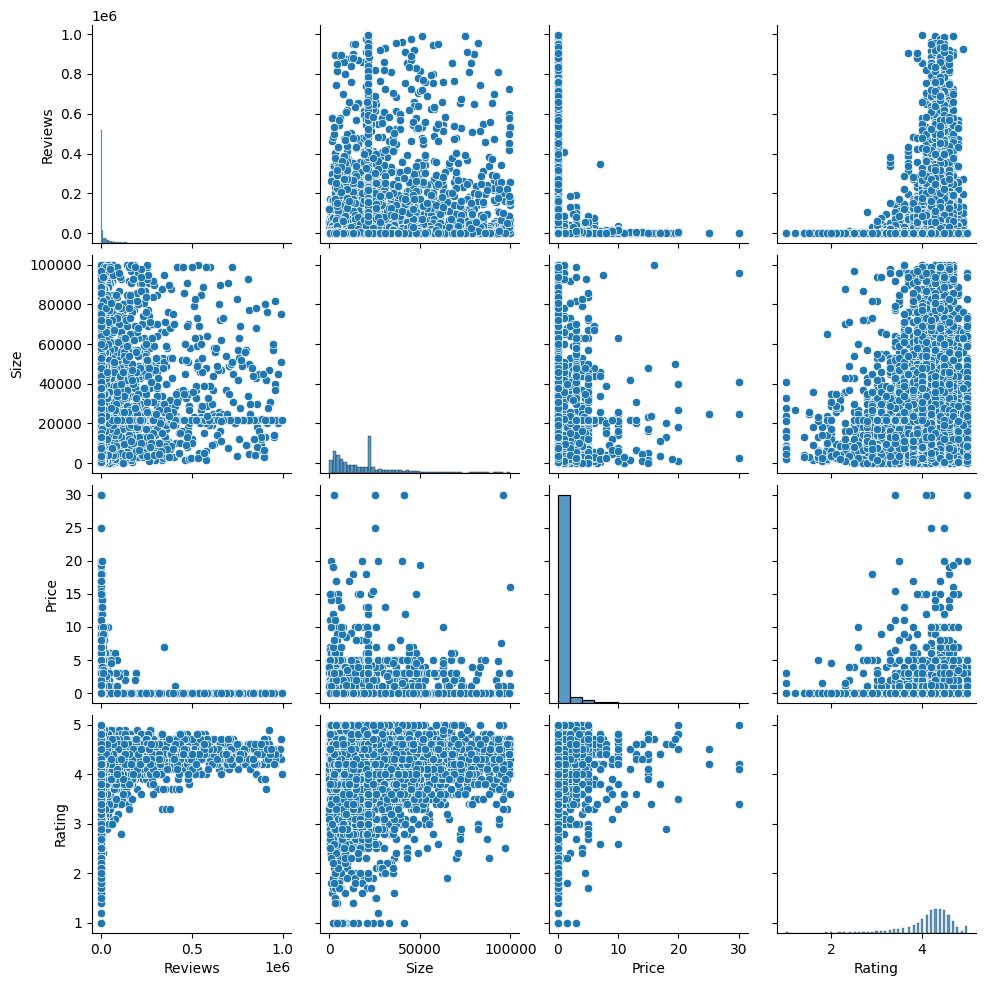

In [369]:
sns.pairplot(inp1[['Reviews', 'Size', 'Price','Rating']])
plt.show()

<Axes: xlabel='Content Rating'>

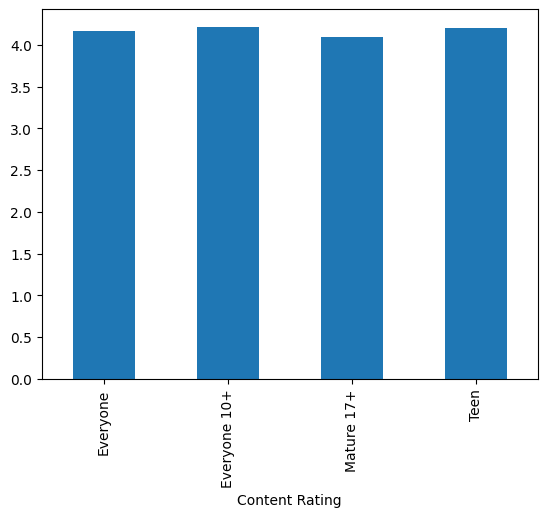

In [370]:
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<Axes: xlabel='Content Rating'>

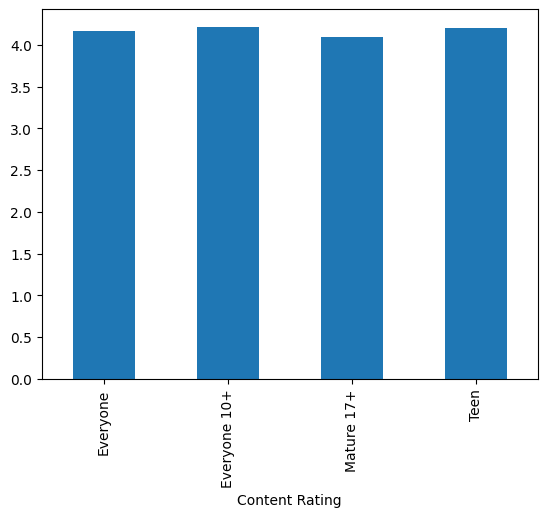

In [371]:
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<Axes: xlabel='Content Rating'>

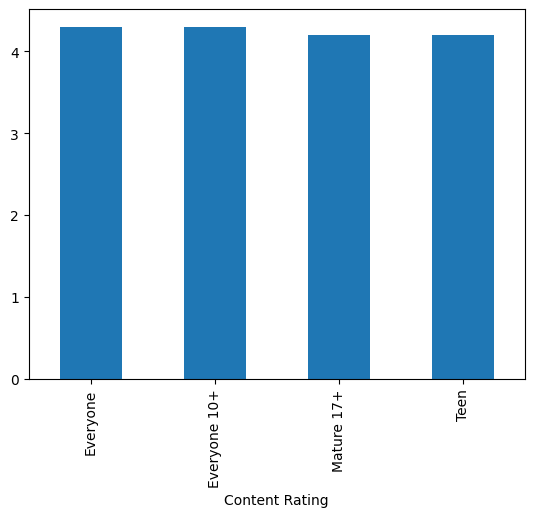

In [372]:
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

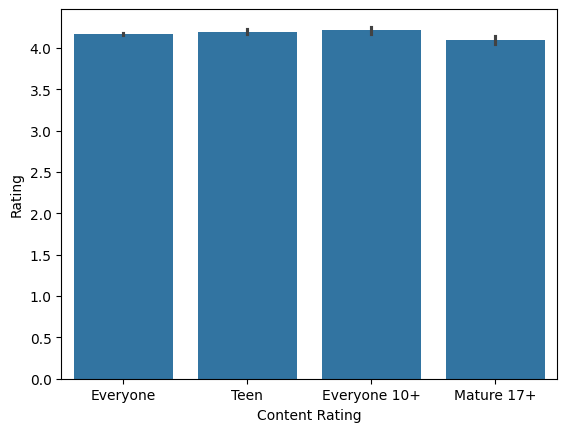

In [373]:
sns.barplot(data=inp1, x="Content Rating", y="Rating")
plt.show()

In [374]:
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.av)
plt.show()

AttributeError: module 'numpy' has no attribute 'av'

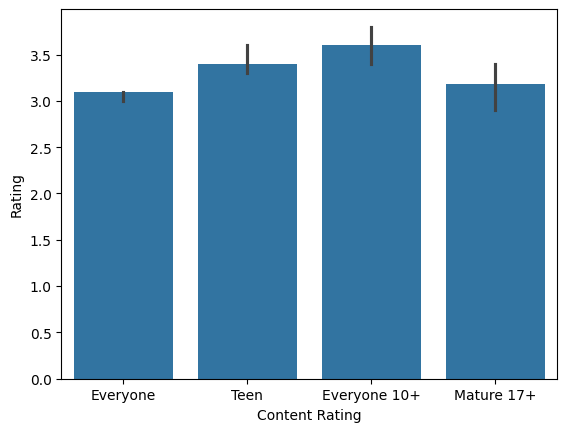

In [245]:
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x,0.05))
plt.show()

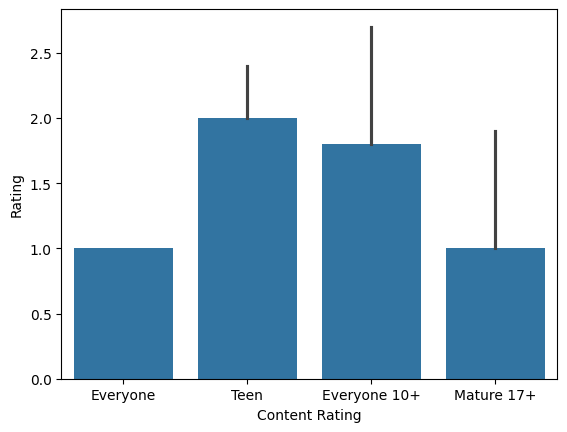

In [246]:
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator=np.min)
plt.show()

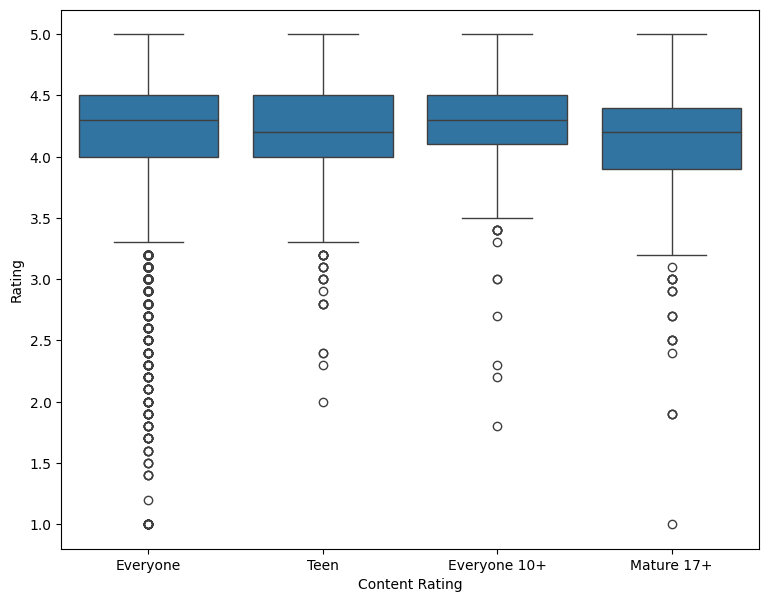

In [252]:
plt.figure(figsize=(9, 7))  # Use a tuple for figsize
sns.boxplot(x=inp1['Content Rating'], y=inp1['Rating'])
plt.show()

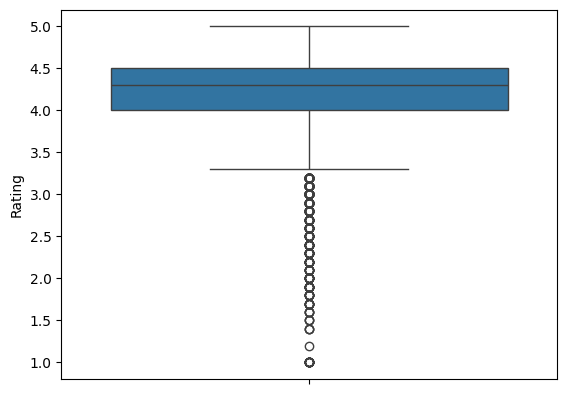

In [253]:
sns.boxplot(inp1.Rating)
plt.show()

In [254]:
inp1['Genres'].value_counts()

Genres
Tools                     694
Entertainment             508
Education                 464
Medical                   344
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: count, Length: 115, dtype: int64

In [255]:
c = ['Tools','Entertainment','Medical','Education']
inp5= inp1[inp1['Genres'].isin(c)]

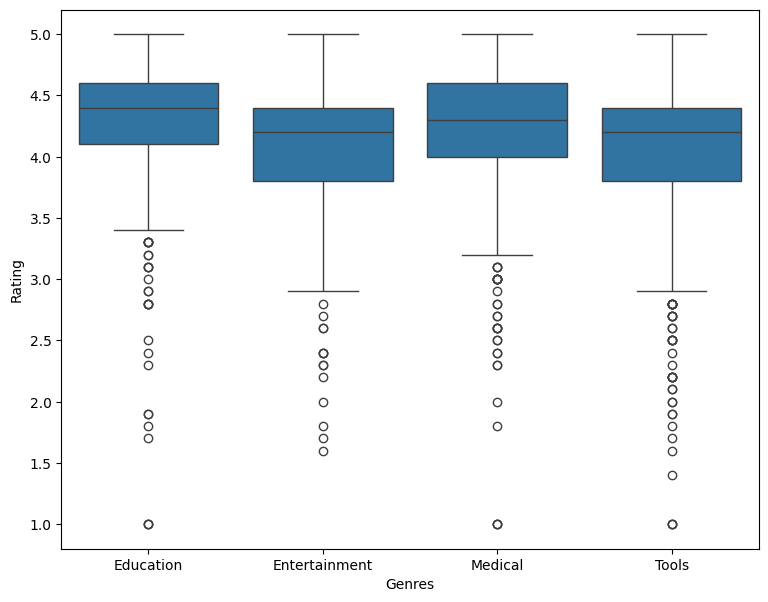

In [257]:
plt.figure(figsize=(9, 7))  # Use a tuple for figsize
sns.boxplot(x=inp5['Genres'], y=inp5['Rating'])
plt.show()

In [258]:
inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [261]:
inp1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Size_Bucket  
0  4.0.3 and up           M  
1  4.0.3 and up           M  
2  4.0.3 and up           L  
3    4.2 and up           H  
4    4.4 and up          VL

In [259]:

pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating")

Size_Bucket           VL         L         M         H        VH
Content Rating                                                  
Everyone        4.117536  4.158405  4.215699  4.170799  4.187396
Everyone 10+    4.189474  4.207407  4.238318  4.193443  4.217073
Mature 17+      3.978947  4.124211  4.021705  4.155172  4.193814
Teen            4.184848  4.233094  4.138408  4.198131  4.246154

In [260]:
pd.pivot_table(data=inp1, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=np.median)

Size_Bucket       VL    L    M    H   VH
Content Rating                          
Everyone        4.20  4.3  4.3  4.3  4.3
Everyone 10+    4.10  4.3  4.3  4.3  4.3
Mature 17+      4.25  4.2  4.1  4.1  4.2
Teen            4.20  4.3  4.2  4.2  4.3

In [262]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

Size_Bucket       VL     L    M    H   VH
Content Rating                           
Everyone        3.80  3.80  4.0  3.8  3.9
Everyone 10+    3.86  3.92  4.1  4.0  4.0
Mature 17+      3.30  3.68  3.7  3.9  4.0
Teen            3.80  3.90  3.9  4.0  4.0

In [263]:
res = pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

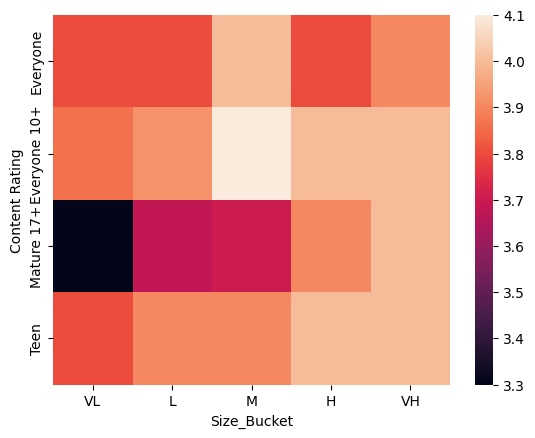

In [264]:
sns.heatmap(res)
plt.show()

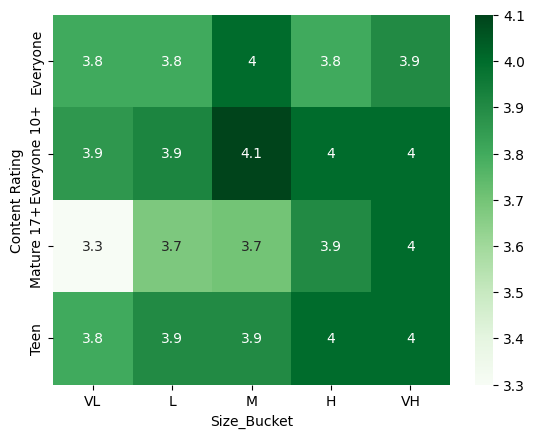

In [265]:
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

In [266]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [267]:
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month

In [268]:
inp1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153308
6     4.172590
7     4.222999
8     4.269286
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

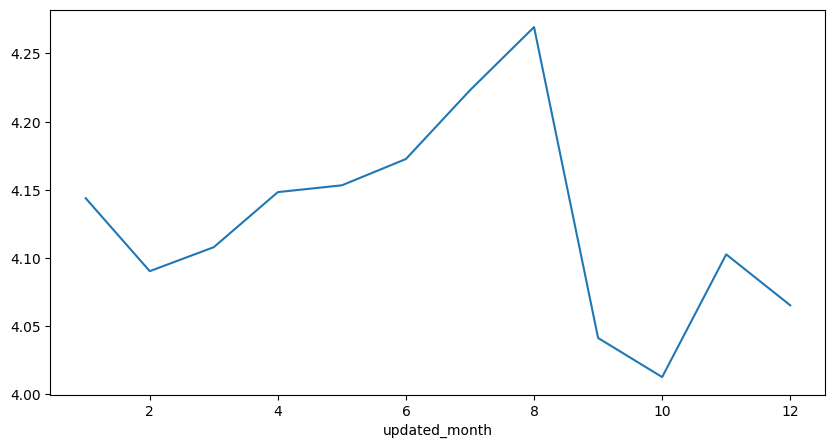

In [269]:
plt.figure(figsize=[10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

In [270]:
pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

Content Rating    Everyone  Everyone 10+  Mature 17+        Teen
updated_month                                                   
1                925387390     105282000     9701210    44159010
2                545372005      19821000    13021500    39597710
3                695365520      30322510     9111100    79850310
4                973371180      23300000     5259000   161619410
5               2361067800     118173500    50140100   202689600
6               2427170505     317727100   145257200   415716600
7               8271109680     456556000   419491910  1943556800
8               7430943320     215821000   312981700  6257855650
9                260340410      24931100     2201010    22483100
10               258279680      23101000     3160000    45629210
11               625424710      60310000     1070100    31261100
12               567105770       8410000    12960100    51707100

In [271]:
monthly = pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

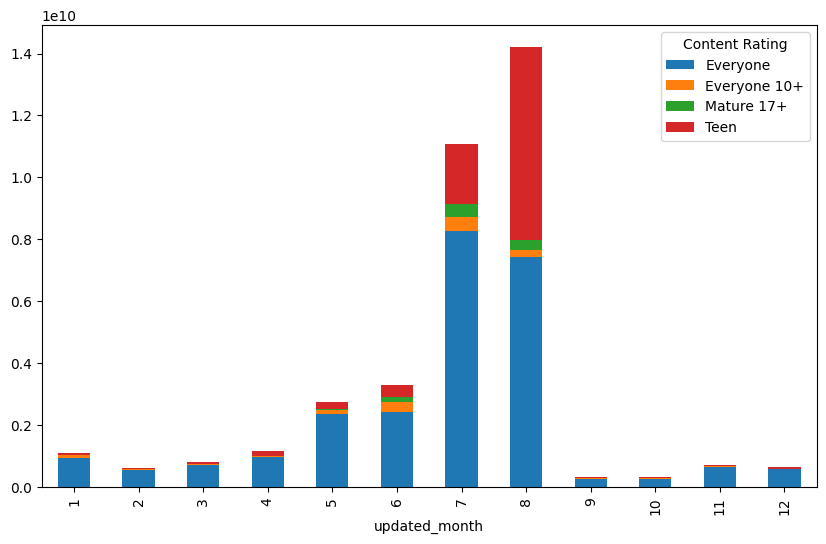

In [272]:
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

In [273]:
monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)

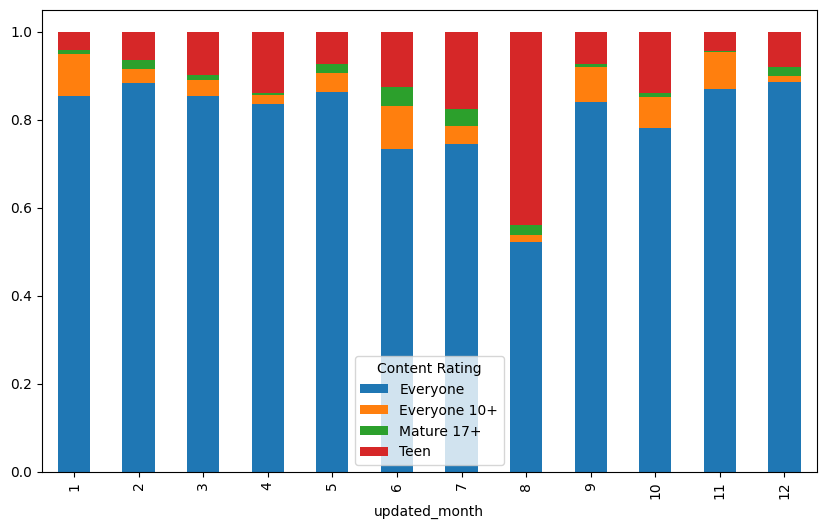

In [274]:
monthly_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

In [275]:
res = inp1.groupby(["updated_month"])[['Rating']].mean()
res.reset_index(inplace=True)

In [276]:
res

updated_month    Rating
0               1  4.143842
1               2  4.090385
2               3  4.107963
3               4  4.148326
4               5  4.153308
5               6  4.172590
6               7  4.222999
7               8  4.269286
8               9  4.041406
9              10  4.012739
10             11  4.102685
11             12  4.065350

In [279]:
fig = px.line(res, x="updated_month",y="Rating",title="Montly average rating")
fig.show()